In [47]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

In [48]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [49]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [50]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [51]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [52]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [53]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [54]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [55]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [56]:
df['duration'].min()

0.83

In [57]:
df['duration'].max()

49.83

In [58]:
df['duration'].median()

11.25

## Preprocessing

In [59]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)


In [60]:
df['stops'] = pd.factorize(df.stops)[0]

In [61]:
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)

In [62]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Training Regression Model

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df['price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
reg.score(X_test, y_test)

0.9857039681897548

In [67]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9857039681897548
MAE: 1062.284180958687
MSE: 7374202.313173007
RMSE: 2715.5482527793547


Text(0.5, 1.0, 'Prediction vs Actual Price')

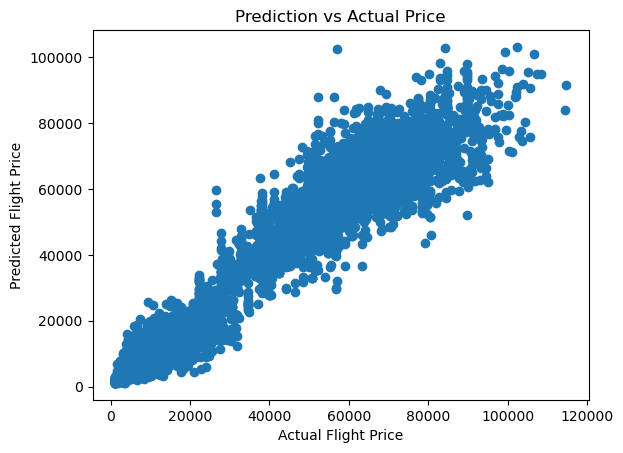

In [68]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

In [69]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [72]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances  = sorted(importances.items(), key=lambda x: x[1], reverse = True)

sorted_importances

[('class', np.float64(0.8796692670675393)),
 ('duration', np.float64(0.057437180674652186)),
 ('days_left', np.float64(0.018669982899577)),
 ('airline_Vistara', np.float64(0.005540903704830753)),
 ('airline_Air_India', np.float64(0.004551831931281951)),
 ('source_Delhi', np.float64(0.0036955738962579183)),
 ('dest_Delhi', np.float64(0.0033150574225072433)),
 ('source_Mumbai', np.float64(0.002123546851867547)),
 ('dest_Mumbai', np.float64(0.0019761090474224993)),
 ('dest_Kolkata', np.float64(0.0018840043622940404)),
 ('source_Kolkata', np.float64(0.0017989949448067232)),
 ('stops', np.float64(0.001771834047064356)),
 ('dest_Hyderabad', np.float64(0.0015537146885282657)),
 ('arrival_Evening', np.float64(0.0015218892165626227)),
 ('source_Hyderabad', np.float64(0.0012925992880957469)),
 ('dest_Bangalore', np.float64(0.001237722621611715)),
 ('source_Bangalore', np.float64(0.001171300768239561)),
 ('departure_Evening', np.float64(0.0011596369460563655)),
 ('arrival_Night', np.float64(0.001

<BarContainer object of 10 artists>

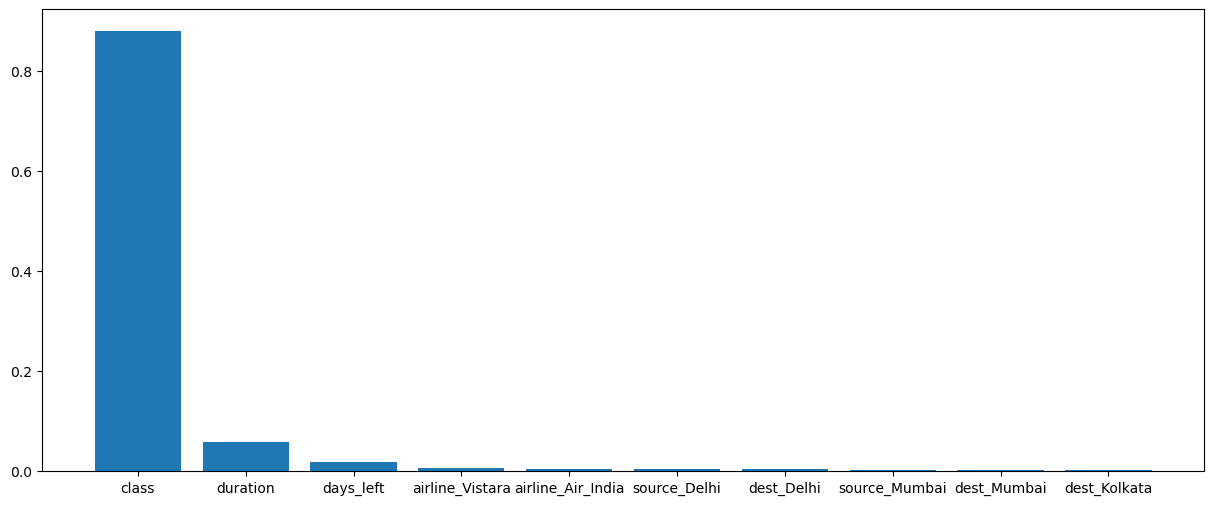

In [75]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimator': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, None, 'sqrt', 'log2', 0.5]
}

reg = RandomForestRegressor(n_jobs=-1, random_state=10)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, 
                                   n_jobs=-1, error_score='raise')

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=213; total time=  12.8s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=213; total time=  12.8s
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=213; total time=  12.9s
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  19.6s
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  19.6s
[CV] END max_depth=30, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  19.6s


In [79]:
best_regressor.score(X_test, y_test)

0.9863032695063209

In [80]:
y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9863032695063209
MAE: 1138.3216267841824
MSE: 7065069.736135627
RMSE: 2658.0198900940577


Text(0.5, 1.0, 'Prediction vs Actual Price')

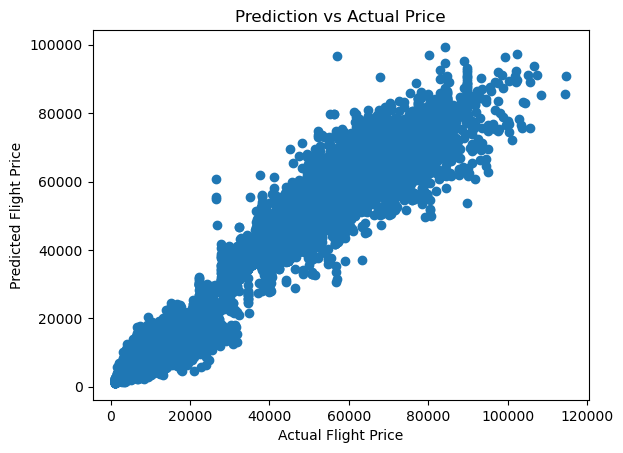

In [81]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')